In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
df_ori = pd.read_csv('BankLoanApproval.csv')
df = df_ori.copy()


In [8]:
#split data in train 60%, test 20% and test 20% in random
train, validation = train_test_split(df, test_size = 0.4, random_state = 42)
validation, test = train_test_split(validation, test_size = 0.5, random_state = 42)

#save the data
train.to_csv('train.csv', index=False)
validation.to_csv('validation.csv', index=False)
test.to_csv('test.csv', index=False)


In [9]:
# Display the first 5 rows of the data
print(train.head()) 
 

            LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
144682  8RIJERIS4W   41   40091      187157          501              31   
59707   EYKE19F87G   36   32862      154816          512              17   
155429  QZ124DO376   19  106163        9059          675             108   
129910  LCLQFZDC8V   50   61237      143200          781              90   
204029  0IQEER1GBY   36   36601       58211          407              95   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
144682               1          3.59        36      0.83          PhD   
59707                1          2.50        12      0.31   Bachelor's   
155429               4          6.20        36      0.76     Master's   
129910               4         14.86        24      0.56  High School   
204029               4         13.72        12      0.70  High School   

       EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
144682      Part-time      

In [10]:
# Display the shape of the data
print(train.shape)


(153196, 18)


In [11]:
# Display the data types and names of each column
print("Names and Data types of each column:")
print(train.dtypes)


Names and Data types of each column:
LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object


In [12]:
# Display the number of missing values in each column
print("Missing values in each column:")
print(train.isnull().sum())
print()

# Display the numbers of duplicated rows
print("Duplicated rows: " + train.duplicated().sum().astype(str))



Missing values in each column:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Duplicated rows: 0


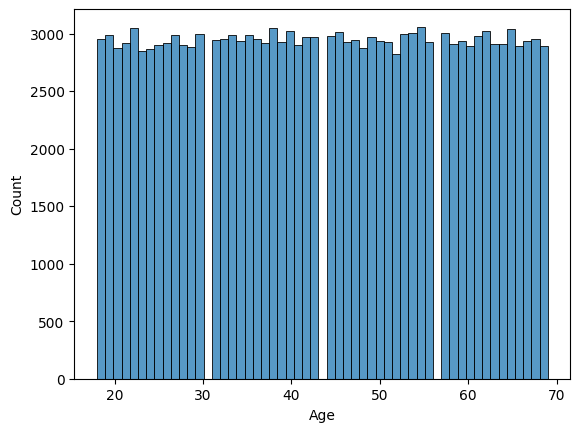

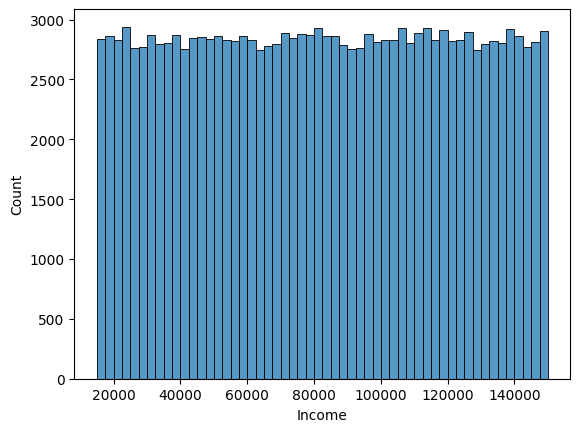

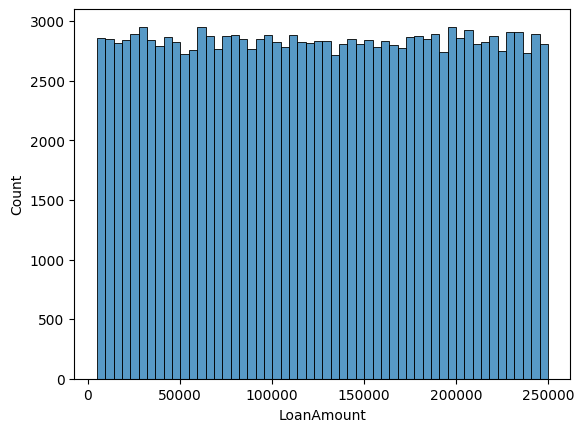

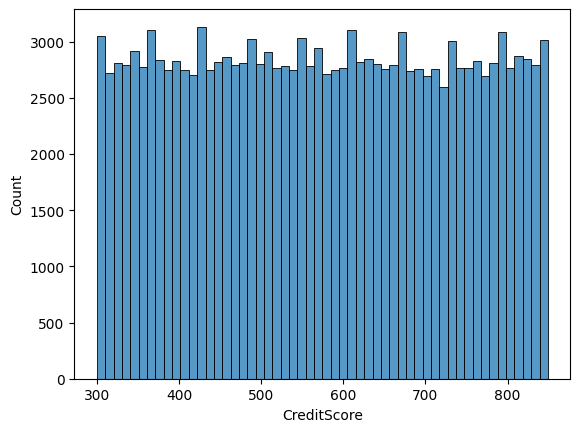

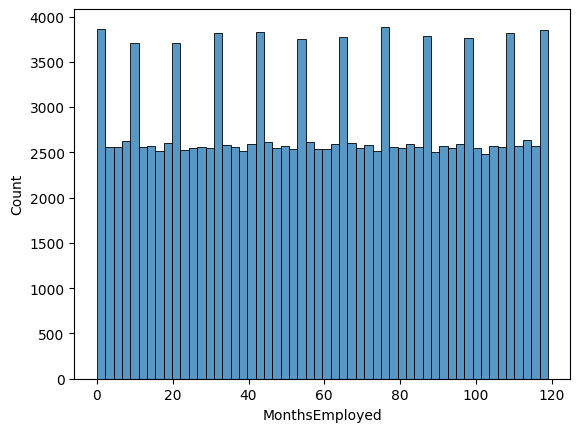

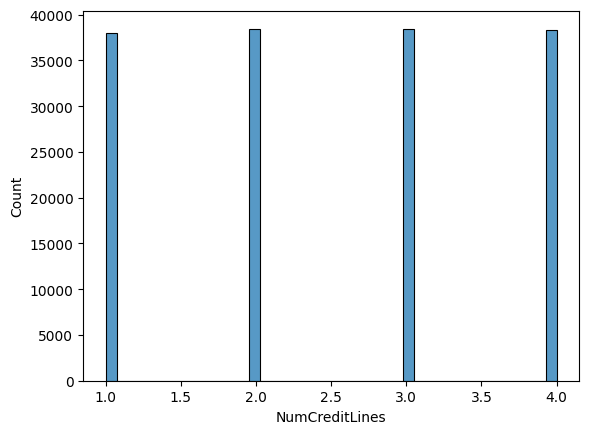

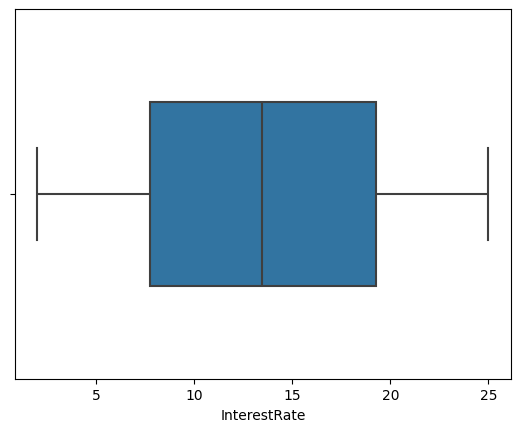

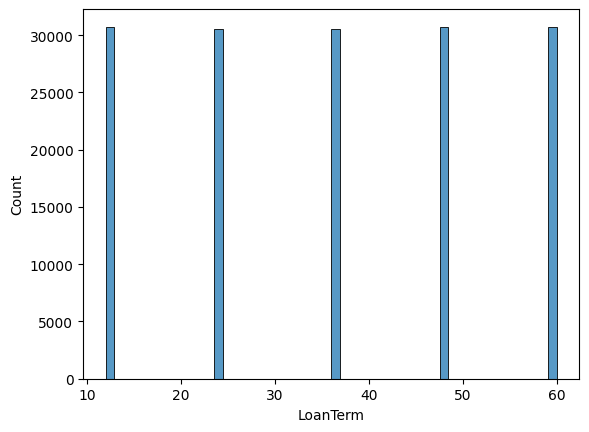

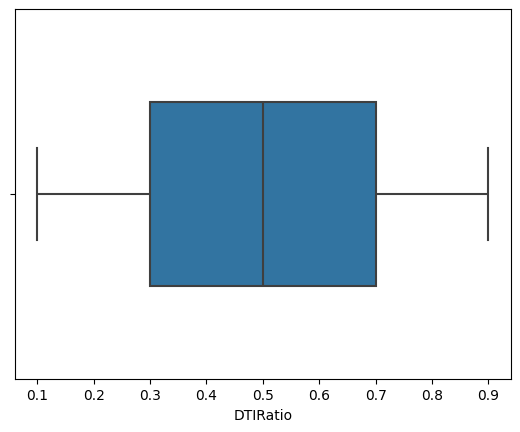

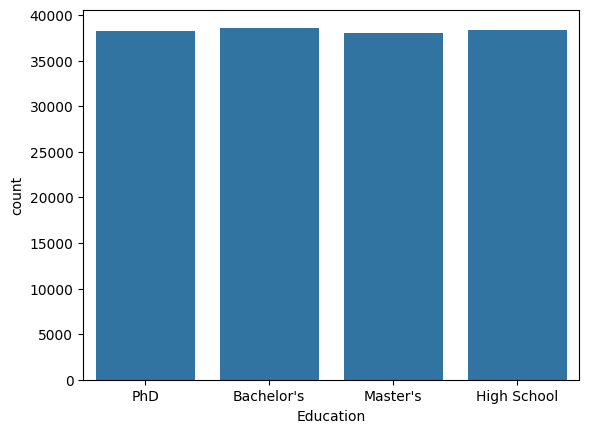

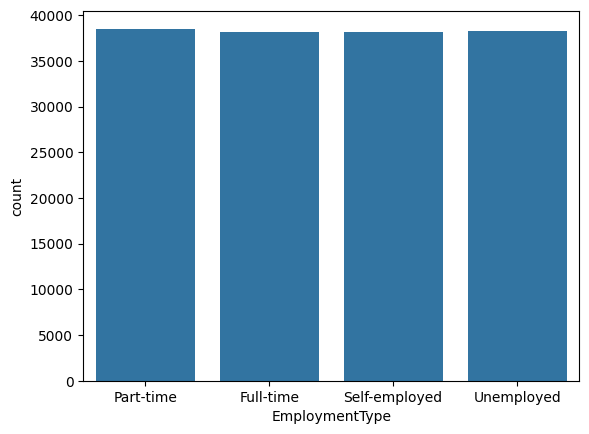

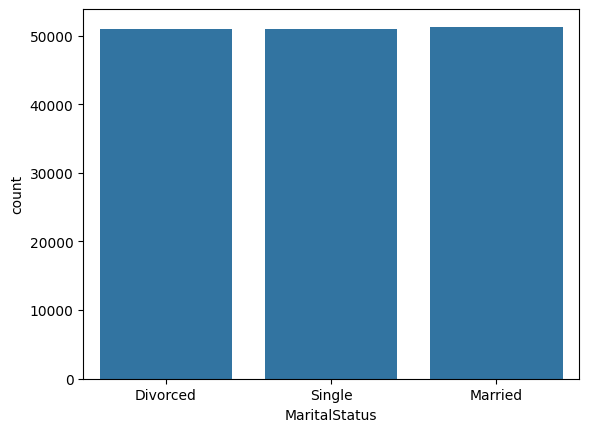

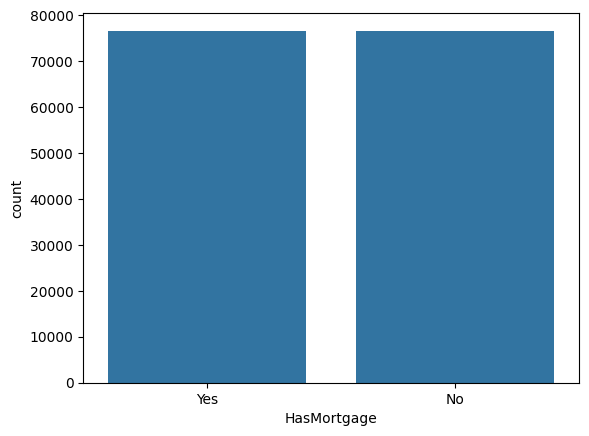

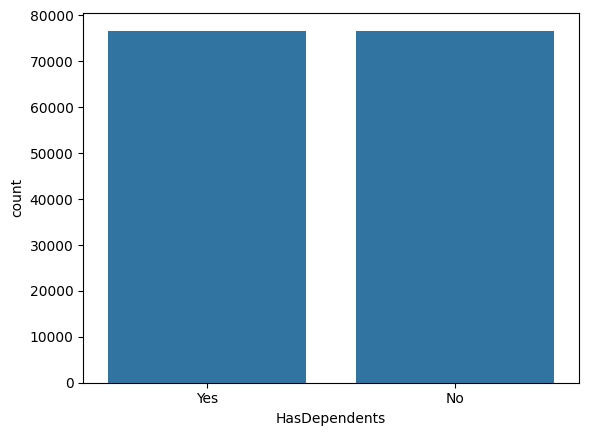

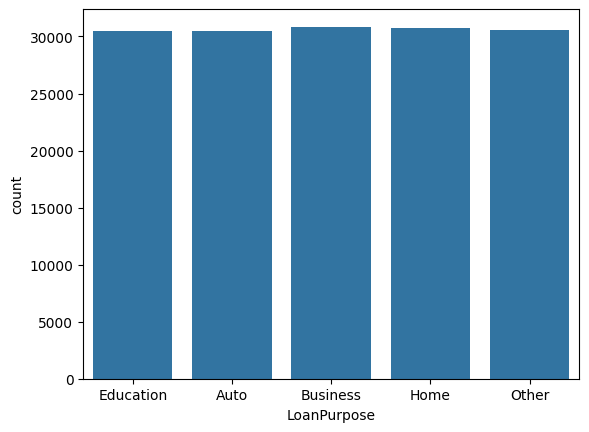

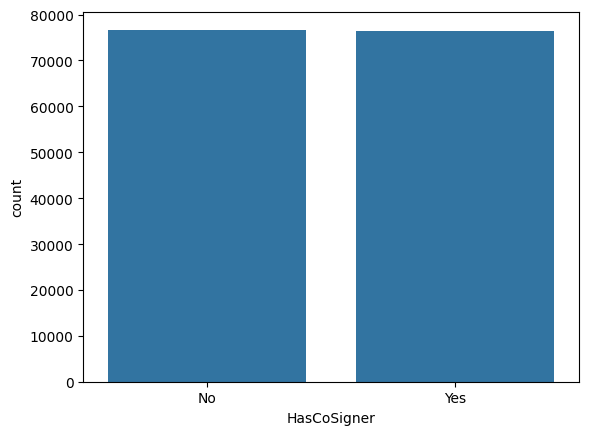

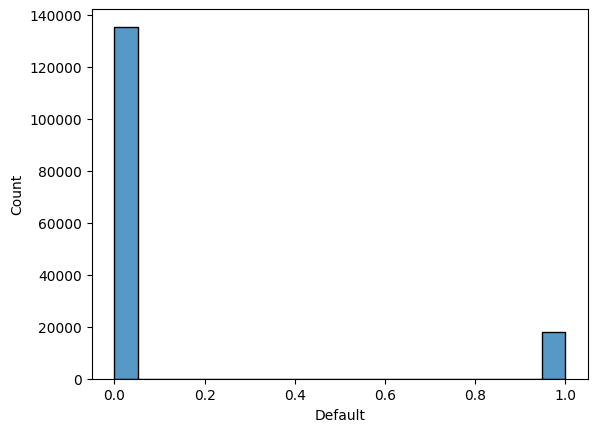

In [13]:

columns = train.columns
# drop Loan_ID column beacuse it is not useful for the analysis
columns = columns.drop('LoanID')


# Plot graphs of the data to see the distribution of the data
for column in columns:
    if column == 'LoanID':
        continue
    elif train[column].dtype == 'object':      #categorical data
        sns.countplot(data=train, x=column)
        plt.show()
    elif train[column].dtype == 'float64':     #continuous data boxplot
        sns.boxplot(data=train, x=column, width=0.5, linewidth=1.5)
        plt.show()
    else:                                   #discrete data
        sns.histplot(data=train, x=column)
        plt.show()
